<a href="https://colab.research.google.com/github/KarltonBotics/Integrador_CentinelAI/blob/main/Avance4_Equipo58.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 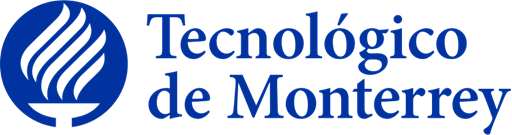


Maestría en Inteligencia Artificial Aplicada
**texto en negrita**
Proyecto Integrador
Septiembre – Diciembre
2025

Actividad 3
Avance 1. Análisis exploratorio de datos

Docentes:

*  Dra. Grettel Barceló Alonso
*  Dra. Verónica Sandra Guzmán De Valle

Asesor:

*   Dr. Luis Eduardo Falcón

Alumno:
*   Carlos Enríquez Gorgonio
A01793102
  
Octubrebre 2025


##**SECCIÓN 1 PREPARACION Y COMPROBACIÓN DE DATASETS**<br>
<br>
--------------------------------------------------------------------------------
<br>
--------------------------------------------------------------------------------<br>

Importacion de librerias generales de todo el proyec

In [1]:
import folium #Mapa
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import locale
import pyproj

from google.colab import drive
from IPython.display import display, HTML
from scipy.stats import skew, chi2_contingency
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from statsmodels.tsa.seasonal import seasonal_decompose
from tabulate import tabulate

Carga de los DataSets

In [2]:
drive.mount('/content/drive')

#DataSet Principal
#file_path = '/mnt/DataSetFinal25_13_A.xlsx'
file_path = '/content/drive/MyDrive/DataSetFinal25_13_A.xlsx'
df = pd.read_excel(file_path, header=0,)
df.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CLAVE DE INCENDIO,FECHA DE REPORTE,LONGITUD GRADOS,LONGITUD MINUTOS,LONGITUD SEGUNDOS,LATITUD GRADOS,LATITUD MINUTOS,LATITUD SEGUNDOS,LATITUD,LONGITUD,...,REGIMEN DE FUEGO,ARBOLADO ADULTO,RENUEVO,ARBUSTIVO,HERBACEO,HOJARASCA,ARBOREO,SUELO ORGANICO,TOTAL HA,COSTO ESTIMADO
0,25-10-0001,45860.631944,105.0,2.0,18.0,23.0,9.0,29,NaN,NaN,...,Influido,0.0,0,38.5400,24.5254,42.0436,NaN,NaN,105.1090,1400.0
1,25-10-0002,45859.993056,106.0,16.0,25.0,25.0,11.0,40,NaN,NaN,...,Dependiente,0.0,1.7069,15.3622,10.2415,17.0692,NaN,NaN,44.3798,1150.0
2,25-10-0003,45839.534028,104.0,42.0,30.0,24.0,6.0,52,NaN,NaN,...,Dependiente,0.0,0,1.1314,5.6571,0.0000,NaN,NaN,6.7885,1150.0
3,25-10-0004,45771.443056,104.0,41.0,50.0,23.0,56.0,0,NaN,NaN,...,Dependiente,0.0,0,6.3044,12.6087,0.0000,NaN,NaN,18.9131,1150.0
4,25-10-0005,45860.618056,105.0,19.0,19.0,23.0,54.0,35,NaN,NaN,...,Dependiente,0.0,0,0.0000,0.0000,22.7810,NaN,NaN,22.7810,1150.0
5,25-10-0006,45860.611111,106.0,20.0,49.0,25.0,24.0,57,NaN,NaN,...,Dependiente,0.0,0.0853,0.2985,6.8236,6.4397,NaN,NaN,13.6471,1575.0
6,25-10-0007,45860.585417,106.0,21.0,14.0,25.0,6.0,36,NaN,NaN,...,Dependiente,0.0,1.0454,4.1818,4.1818,11.4999,NaN,NaN,20.9089,5265.0
7,25-10-0008,45860.000694,106.0,32.0,3.0,24.0,57.0,4,NaN,NaN,...,Dependiente,0.0,0,5.6731,16.3890,9.4552,NaN,NaN,31.5173,5265.0
8,25-10-0009,45839.588889,105.0,3.0,58.0,23.0,53.0,6,NaN,NaN,...,Dependiente,0.0,0,0.0000,2.8940,0.2516,NaN,NaN,3.1456,5055.0
9,25-10-0010,45771.455556,105.0,29.0,47.0,24.0,15.0,29,NaN,NaN,...,Dependiente,0.0,0.1054,0.1580,2.3706,0.3161,NaN,NaN,2.9501,2200.0


In [3]:
df.columns

Index(['CLAVE DE INCENDIO', 'FECHA DE REPORTE', 'LONGITUD GRADOS',
       'LONGITUD MINUTOS', 'LONGITUD SEGUNDOS', 'LATITUD GRADOS',
       'LATITUD MINUTOS', 'LATITUD SEGUNDOS', 'LATITUD', 'LONGITUD',
       'COORDENADAS', 'CLAVE MUNICIPIO', 'NOMBRE MUNICIPIO', 'PREDIO O PARAJE',
       'CAUSA DEL INCENDIO', 'CAUSA ESPECIFICA', 'FECHA INICIO',
       'FECHA LIQUIDACION', 'TIPO DE INCENDIO', 'TIPO DE VEGETACION',
       'ZONA BIOCLIMATICA', 'REGIMEN DE FUEGO', 'ARBOLADO ADULTO', 'RENUEVO',
       'ARBUSTIVO', 'HERBACEO', 'HOJARASCA', 'ARBOREO', 'SUELO ORGANICO',
       'TOTAL HA', 'COSTO ESTIMADO'],
      dtype='object')

In [4]:
#DataSet de Municipios y Coordenadas
#nombre_archivo = '/mnt/poblacion.csv'
nombre_archivo = '/content/drive/MyDrive/poblacion.csv'
df_c = pd.read_csv(nombre_archivo, encoding='utf-8')
df_c['municipio'] = df_c['municipio'].str.upper()
df_c= df_c[df_c['entidad'] == 'Durango'].copy()
df_c.head(10)

,clave_entidad,entidad,clave_municipio,municipio,longitud,latitud,poblacion
289,10,Durango,1,CANATLÁN,-104.464214,24.313815,31454
290,10,Durango,2,CANELAS,-106.324428,25.072270,4321
291,10,Durango,3,CONETO DE COMONFORT,-104.460810,24.584485,4084
292,10,Durango,4,CUENCAMÉ,-103.415446,24.521538,34955
293,10,Durango,5,DURANGO,-104.401270,24.012636,688697
294,10,Durango,6,GENERAL SIMÓN BOLÍVAR,-103.133351,24.412067,10038
295,10,Durango,7,GÓMEZ PALACIO,-103.294710,25.341239,372750
296,10,Durango,8,GUADALUPE VICTORIA,-104.072518,24.264716,36695
297,10,Durango,9,GUANACEVÍ,-105.571596,25.555398,9869
298,10,Durango,10,HIDALGO,-104.544852,26.150520,3843


In [5]:
df_c.columns

Index(['clave_entidad', 'entidad', 'clave_municipio', 'municipio', 'longitud',
       'latitud', 'poblacion'],
      dtype='object')

In [6]:
#------------------------------------------------------
dimensiones = df.shape
print(f"El DataFrame tiene: {dimensiones[0]} filas")
print(f"El DataFrame tiene: {dimensiones[1]} columnas")
dimensiones_c = df_c.shape
print(f"El DataFrame tiene: {dimensiones_c[0]} filas")
print(f"El DataFrame tiene: {dimensiones_c[1]} columnas")

#Para exportar
#df.to_excel('/mnt/validar.xlsx', index=False)


El DataFrame tiene: 3750 filas
El DataFrame tiene: 31 columnas
El DataFrame tiene: 39 filas
El DataFrame tiene: 7 columnas


Verificación de tamaños

#<mark>**RESPALDO DATASET**</mark>

In [7]:
df_Original = df

Desde el df_C o DataSet que contiene las coordenadas de los municipios del estado de durango, renombramos y añadimos al df original las columnas de "longitud_municipio" y "latitud_muunicipio

In [8]:
df_c = df_c[['municipio', 'longitud', 'latitud']].rename(columns={
    'municipio':'municipio',
    'longitud': 'longitud_municipio',
    'latitud': 'latitud_municipio'
})
#  Fusionar
df = pd.merge(
    df,
    df_c[['municipio', 'longitud_municipio', 'latitud_municipio']],
    left_on='NOMBRE MUNICIPIO',
    right_on='municipio',
    how='left'
)
# Eliminar 'municipio' redundante.
df = df.drop(columns=['municipio'])

In [9]:
dimensiones = df.shape
print(f"El DataFrame tiene: {dimensiones[0]} filas")
print(f"El DataFrame tiene: {dimensiones[1]} columnas")
df.head(10)

El DataFrame tiene: 3750 filas
El DataFrame tiene: 33 columnas


,CLAVE DE INCENDIO,FECHA DE REPORTE,LONGITUD GRADOS,LONGITUD MINUTOS,LONGITUD SEGUNDOS,LATITUD GRADOS,LATITUD MINUTOS,LATITUD SEGUNDOS,LATITUD,LONGITUD,...,RENUEVO,ARBUSTIVO,HERBACEO,HOJARASCA,ARBOREO,SUELO ORGANICO,TOTAL HA,COSTO ESTIMADO,longitud_municipio,latitud_municipio
0,25-10-0001,45860.631944,105.0,2.0,18.0,23.0,9.0,29,NaN,NaN,...,0,38.5400,24.5254,42.0436,NaN,NaN,105.1090,1400.0,NaN,NaN
1,25-10-0002,45859.993056,106.0,16.0,25.0,25.0,11.0,40,NaN,NaN,...,1.7069,15.3622,10.2415,17.0692,NaN,NaN,44.3798,1150.0,NaN,NaN
2,25-10-0003,45839.534028,104.0,42.0,30.0,24.0,6.0,52,NaN,NaN,...,0,1.1314,5.6571,0.0000,NaN,NaN,6.7885,1150.0,NaN,NaN
3,25-10-0004,45771.443056,104.0,41.0,50.0,23.0,56.0,0,NaN,NaN,...,0,6.3044,12.6087,0.0000,NaN,NaN,18.9131,1150.0,NaN,NaN
4,25-10-0005,45860.618056,105.0,19.0,19.0,23.0,54.0,35,NaN,NaN,...,0,0.0000,0.0000,22.7810,NaN,NaN,22.7810,1150.0,NaN,NaN
5,25-10-0006,45860.611111,106.0,20.0,49.0,25.0,24.0,57,NaN,NaN,...,0.0853,0.2985,6.8236,6.4397,NaN,NaN,13.6471,1575.0,NaN,NaN
6,25-10-0007,45860.585417,106.0,21.0,14.0,25.0,6.0,36,NaN,NaN,...,1.0454,4.1818,4.1818,11.4999,NaN,NaN,20.9089,5265.0,NaN,NaN
7,25-10-0008,45860.000694,106.0,32.0,3.0,24.0,57.0,4,NaN,NaN,...,0,5.6731,16.3890,9.4552,NaN,NaN,31.5173,5265.0,NaN,NaN
8,25-10-0009,45839.588889,105.0,3.0,58.0,23.0,53.0,6,NaN,NaN,...,0,0.0000,2.8940,0.2516,NaN,NaN,3.1456,5055.0,NaN,NaN
9,25-10-0010,45771.455556,105.0,29.0,47.0,24.0,15.0,29,NaN,NaN,...,0.1054,0.1580,2.3706,0.3161,NaN,NaN,2.9501,2200.0,NaN,NaN


In [10]:
df.columns

Index(['CLAVE DE INCENDIO', 'FECHA DE REPORTE', 'LONGITUD GRADOS',
       'LONGITUD MINUTOS', 'LONGITUD SEGUNDOS', 'LATITUD GRADOS',
       'LATITUD MINUTOS', 'LATITUD SEGUNDOS', 'LATITUD', 'LONGITUD',
       'COORDENADAS', 'CLAVE MUNICIPIO', 'NOMBRE MUNICIPIO', 'PREDIO O PARAJE',
       'CAUSA DEL INCENDIO', 'CAUSA ESPECIFICA', 'FECHA INICIO',
       'FECHA LIQUIDACION', 'TIPO DE INCENDIO', 'TIPO DE VEGETACION',
       'ZONA BIOCLIMATICA', 'REGIMEN DE FUEGO', 'ARBOLADO ADULTO', 'RENUEVO',
       'ARBUSTIVO', 'HERBACEO', 'HOJARASCA', 'ARBOREO', 'SUELO ORGANICO',
       'TOTAL HA', 'COSTO ESTIMADO', 'longitud_municipio',
       'latitud_municipio'],
      dtype='object')

#<mark>**RESPALDO DATASET**</mark>

In [11]:
df_Completo = df

##**SECCIÓN 2 CREACIÓN DE FUNCIONES PARA LOS PIPELINES**
<br>
--------------------------------------------------------------------------------
<br>
--------------------------------------------------------------------------------<br>

#<mark style="background-color: #a0e8a0;">**FUNCIÓN convertir_mayusculas**</mark>

Primero definimos una funcion que convierte a mayusculas todos los encabezados de nuestro dataset y tambien todos los registros.

In [12]:
def convertir__mayusculas(df):
  #Encabezados
  df.columns = df.columns.str.upper()
  #Registros tipo objeto
  columnas_texto = df.select_dtypes(include=['object']).columns
  for col in columnas_texto:
    df[col] = df[col].str.upper()
  return df

In [13]:
convertir__mayusculas(df)

,CLAVE DE INCENDIO,FECHA DE REPORTE,LONGITUD GRADOS,LONGITUD MINUTOS,LONGITUD SEGUNDOS,LATITUD GRADOS,LATITUD MINUTOS,LATITUD SEGUNDOS,LATITUD,LONGITUD,...,RENUEVO,ARBUSTIVO,HERBACEO,HOJARASCA,ARBOREO,SUELO ORGANICO,TOTAL HA,COSTO ESTIMADO,LONGITUD_MUNICIPIO,LATITUD_MUNICIPIO
0,25-10-0001,NaN,105.0,2.0,18.0,23.0,9.0,NaN,NaN,NaN,...,NaN,38.5400,24.5254,42.0436,NaN,NaN,105.1090,1400.0,NaN,NaN
1,25-10-0002,NaN,106.0,16.0,25.0,25.0,11.0,NaN,NaN,NaN,...,NaN,15.3622,10.2415,17.0692,NaN,NaN,44.3798,1150.0,NaN,NaN
2,25-10-0003,NaN,104.0,42.0,30.0,24.0,6.0,NaN,NaN,NaN,...,NaN,1.1314,5.6571,0.0000,NaN,NaN,6.7885,1150.0,NaN,NaN
3,25-10-0004,NaN,104.0,41.0,50.0,23.0,56.0,NaN,NaN,NaN,...,NaN,6.3044,12.6087,0.0000,NaN,NaN,18.9131,1150.0,NaN,NaN
4,25-10-0005,NaN,105.0,19.0,19.0,23.0,54.0,NaN,NaN,NaN,...,NaN,0.0000,0.0000,22.7810,NaN,NaN,22.7810,1150.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,13-10-227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0000,1.0000,NaN,NaN,NaN,4.0000,NaN,-105.432281,25.203555
3746,13-10-228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0000,2.0000,NaN,NaN,3.0000,NaN,-105.555248,24.060785
3747,13-10-229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0000,1.0000,NaN,NaN,2.0000,NaN,-105.555248,24.060785
3748,13-10-230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.0000,3.0000,NaN,NaN,NaN,10.0000,NaN,-105.432281,25.203555


In [14]:
dimensiones = df.shape
print(f"El DataFrame tiene: {dimensiones[0]} filas")
print(f"El DataFrame tiene: {dimensiones[1]} columnas")
df.head(10)

El DataFrame tiene: 3750 filas
El DataFrame tiene: 33 columnas


,CLAVE DE INCENDIO,FECHA DE REPORTE,LONGITUD GRADOS,LONGITUD MINUTOS,LONGITUD SEGUNDOS,LATITUD GRADOS,LATITUD MINUTOS,LATITUD SEGUNDOS,LATITUD,LONGITUD,...,RENUEVO,ARBUSTIVO,HERBACEO,HOJARASCA,ARBOREO,SUELO ORGANICO,TOTAL HA,COSTO ESTIMADO,LONGITUD_MUNICIPIO,LATITUD_MUNICIPIO
0,25-10-0001,NaN,105.0,2.0,18.0,23.0,9.0,NaN,NaN,NaN,...,NaN,38.5400,24.5254,42.0436,NaN,NaN,105.1090,1400.0,NaN,NaN
1,25-10-0002,NaN,106.0,16.0,25.0,25.0,11.0,NaN,NaN,NaN,...,NaN,15.3622,10.2415,17.0692,NaN,NaN,44.3798,1150.0,NaN,NaN
2,25-10-0003,NaN,104.0,42.0,30.0,24.0,6.0,NaN,NaN,NaN,...,NaN,1.1314,5.6571,0.0000,NaN,NaN,6.7885,1150.0,NaN,NaN
3,25-10-0004,NaN,104.0,41.0,50.0,23.0,56.0,NaN,NaN,NaN,...,NaN,6.3044,12.6087,0.0000,NaN,NaN,18.9131,1150.0,NaN,NaN
4,25-10-0005,NaN,105.0,19.0,19.0,23.0,54.0,NaN,NaN,NaN,...,NaN,0.0000,0.0000,22.7810,NaN,NaN,22.7810,1150.0,NaN,NaN
5,25-10-0006,NaN,106.0,20.0,49.0,25.0,24.0,NaN,NaN,NaN,...,NaN,0.2985,6.8236,6.4397,NaN,NaN,13.6471,1575.0,NaN,NaN
6,25-10-0007,NaN,106.0,21.0,14.0,25.0,6.0,NaN,NaN,NaN,...,NaN,4.1818,4.1818,11.4999,NaN,NaN,20.9089,5265.0,NaN,NaN
7,25-10-0008,NaN,106.0,32.0,3.0,24.0,57.0,NaN,NaN,NaN,...,NaN,5.6731,16.3890,9.4552,NaN,NaN,31.5173,5265.0,NaN,NaN
8,25-10-0009,NaN,105.0,3.0,58.0,23.0,53.0,NaN,NaN,NaN,...,NaN,0.0000,2.8940,0.2516,NaN,NaN,3.1456,5055.0,NaN,NaN
9,25-10-0010,NaN,105.0,29.0,47.0,24.0,15.0,NaN,NaN,NaN,...,NaN,0.1580,2.3706,0.3161,NaN,NaN,2.9501,2200.0,NaN,NaN


In [15]:
df.columns

Index(['CLAVE DE INCENDIO', 'FECHA DE REPORTE', 'LONGITUD GRADOS',
       'LONGITUD MINUTOS', 'LONGITUD SEGUNDOS', 'LATITUD GRADOS',
       'LATITUD MINUTOS', 'LATITUD SEGUNDOS', 'LATITUD', 'LONGITUD',
       'COORDENADAS', 'CLAVE MUNICIPIO', 'NOMBRE MUNICIPIO', 'PREDIO O PARAJE',
       'CAUSA DEL INCENDIO', 'CAUSA ESPECIFICA', 'FECHA INICIO',
       'FECHA LIQUIDACION', 'TIPO DE INCENDIO', 'TIPO DE VEGETACION',
       'ZONA BIOCLIMATICA', 'REGIMEN DE FUEGO', 'ARBOLADO ADULTO', 'RENUEVO',
       'ARBUSTIVO', 'HERBACEO', 'HOJARASCA', 'ARBOREO', 'SUELO ORGANICO',
       'TOTAL HA', 'COSTO ESTIMADO', 'LONGITUD_MUNICIPIO',
       'LATITUD_MUNICIPIO'],
      dtype='object')

#<mark>**RESPALDO DATASET**</mark>

In [16]:
df_Mayusculas = df

#<mark style="background-color: #a0e8a0;">**FUNCIÓN convertir_fechas**</mark>

Estoa funcion convierte nuestras tres columnas de tipo fecha, en un formato homologado, ya que estas pueden contener fechas cortas o largas e incluso tiempo

In [17]:
print(df.dtypes)

CLAVE DE INCENDIO      object
FECHA DE REPORTE      float64
LONGITUD GRADOS       float64
LONGITUD MINUTOS      float64
LONGITUD SEGUNDOS     float64
LATITUD GRADOS        float64
LATITUD MINUTOS       float64
LATITUD SEGUNDOS       object
LATITUD               float64
LONGITUD              float64
COORDENADAS            object
CLAVE MUNICIPIO       float64
NOMBRE MUNICIPIO       object
PREDIO O PARAJE        object
CAUSA DEL INCENDIO     object
CAUSA ESPECIFICA       object
FECHA INICIO           object
FECHA LIQUIDACION      object
TIPO DE INCENDIO       object
TIPO DE VEGETACION     object
ZONA BIOCLIMATICA      object
REGIMEN DE FUEGO       object
ARBOLADO ADULTO       float64
RENUEVO                object
ARBUSTIVO             float64
HERBACEO              float64
HOJARASCA             float64
ARBOREO               float64
SUELO ORGANICO        float64
TOTAL HA              float64
COSTO ESTIMADO        float64
LONGITUD_MUNICIPIO    float64
LATITUD_MUNICIPIO     float64
dtype: obj

In [18]:
"""
def convertir_fechas(df):
  columnas_a_convertir = ['FECHA INICIO', 'FECHA LIQUIDACION']
  for columna in columnas_a_convertir:
    if columna in df.columns:
      fechas_numericas = pd.to_datetime(
        pd.to_numeric(df[columna], errors='coerce'),
          #unit='d',
          origin='1899-12-30',
          errors='coerce' #Esta cuando cauusa el error  d
        )
      fechas_texto = pd.to_datetime(df[columna], dayfirst=True, errors='coerce')
      df[columna] = fechas_numericas.fillna(fechas_texto)
      print(f"Columna '{columna}' convertida exitosamente.")
    else:
      print(f"Advertencia: La columna '{columna}' no se encontró en el DataFrame.")
    #df.dropna(subset=['FECHA INICIO'], inplace=True)
  return df
  """

'\ndef convertir_fechas(df):\n  columnas_a_convertir = [\'FECHA INICIO\', \'FECHA LIQUIDACION\']\n  for columna in columnas_a_convertir:\n    if columna in df.columns:\n      fechas_numericas = pd.to_datetime(\n        pd.to_numeric(df[columna], errors=\'coerce\'),\n          #unit=\'d\',\n          origin=\'1899-12-30\',\n          errors=\'coerce\' #Esta cuando cauusa el error  d\n        )\n      fechas_texto = pd.to_datetime(df[columna], dayfirst=True, errors=\'coerce\')\n      df[columna] = fechas_numericas.fillna(fechas_texto)\n      print(f"Columna \'{columna}\' convertida exitosamente.")\n    else:\n      print(f"Advertencia: La columna \'{columna}\' no se encontró en el DataFrame.")\n    #df.dropna(subset=[\'FECHA INICIO\'], inplace=True)\n  return df\n  '

In [19]:
def convertir_fechas(df):

    columnas_a_convertir = ['FECHA INICIO', 'FECHA LIQUIDACION']
    valores_a_limpiar = ['N/A', 'SIN DATO', '0', 0, 'Pendiente']

    for col in columnas_a_convertir:
        if col in df.columns:
            df[col] = df[col].replace(valores_a_limpiar, np.nan)
    for columna in columnas_a_convertir:
        if columna in df.columns:
            fechas_numericas = pd.to_datetime(
                pd.to_numeric(df[columna], errors='coerce'), # errors='coerce' es clave
                origin='1899-12-30',
                errors='coerce'
            )
            fechas_texto = pd.to_datetime(df[columna], dayfirst=True, errors='coerce')
            df[columna] = fechas_numericas.fillna(fechas_texto)
            print(f"Columna '{columna}' convertida exitosamente.")
        else:
            print(f"Advertencia: La columna '{columna}' no se encontró en el DataFrame.")

    return df

In [20]:
convertir_fechas(df)

Columna 'FECHA INICIO' convertida exitosamente.
Columna 'FECHA LIQUIDACION' convertida exitosamente.


,CLAVE DE INCENDIO,FECHA DE REPORTE,LONGITUD GRADOS,LONGITUD MINUTOS,LONGITUD SEGUNDOS,LATITUD GRADOS,LATITUD MINUTOS,LATITUD SEGUNDOS,LATITUD,LONGITUD,...,RENUEVO,ARBUSTIVO,HERBACEO,HOJARASCA,ARBOREO,SUELO ORGANICO,TOTAL HA,COSTO ESTIMADO,LONGITUD_MUNICIPIO,LATITUD_MUNICIPIO
0,25-10-0001,NaN,105.0,2.0,18.0,23.0,9.0,NaN,NaN,NaN,...,NaN,38.5400,24.5254,42.0436,NaN,NaN,105.1090,1400.0,NaN,NaN
1,25-10-0002,NaN,106.0,16.0,25.0,25.0,11.0,NaN,NaN,NaN,...,NaN,15.3622,10.2415,17.0692,NaN,NaN,44.3798,1150.0,NaN,NaN
2,25-10-0003,NaN,104.0,42.0,30.0,24.0,6.0,NaN,NaN,NaN,...,NaN,1.1314,5.6571,0.0000,NaN,NaN,6.7885,1150.0,NaN,NaN
3,25-10-0004,NaN,104.0,41.0,50.0,23.0,56.0,NaN,NaN,NaN,...,NaN,6.3044,12.6087,0.0000,NaN,NaN,18.9131,1150.0,NaN,NaN
4,25-10-0005,NaN,105.0,19.0,19.0,23.0,54.0,NaN,NaN,NaN,...,NaN,0.0000,0.0000,22.7810,NaN,NaN,22.7810,1150.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,13-10-227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0000,1.0000,NaN,NaN,NaN,4.0000,NaN,-105.432281,25.203555
3746,13-10-228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0000,2.0000,NaN,NaN,3.0000,NaN,-105.555248,24.060785
3747,13-10-229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0000,1.0000,NaN,NaN,2.0000,NaN,-105.555248,24.060785
3748,13-10-230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.0000,3.0000,NaN,NaN,NaN,10.0000,NaN,-105.432281,25.203555


In [21]:
dimensiones = df.shape
print(f"El DataFrame tiene: {dimensiones[0]} filas")
print(f"El DataFrame tiene: {dimensiones[1]} columnas")
df.head(10)

El DataFrame tiene: 3750 filas
El DataFrame tiene: 33 columnas


,CLAVE DE INCENDIO,FECHA DE REPORTE,LONGITUD GRADOS,LONGITUD MINUTOS,LONGITUD SEGUNDOS,LATITUD GRADOS,LATITUD MINUTOS,LATITUD SEGUNDOS,LATITUD,LONGITUD,...,RENUEVO,ARBUSTIVO,HERBACEO,HOJARASCA,ARBOREO,SUELO ORGANICO,TOTAL HA,COSTO ESTIMADO,LONGITUD_MUNICIPIO,LATITUD_MUNICIPIO
0,25-10-0001,NaN,105.0,2.0,18.0,23.0,9.0,NaN,NaN,NaN,...,NaN,38.5400,24.5254,42.0436,NaN,NaN,105.1090,1400.0,NaN,NaN
1,25-10-0002,NaN,106.0,16.0,25.0,25.0,11.0,NaN,NaN,NaN,...,NaN,15.3622,10.2415,17.0692,NaN,NaN,44.3798,1150.0,NaN,NaN
2,25-10-0003,NaN,104.0,42.0,30.0,24.0,6.0,NaN,NaN,NaN,...,NaN,1.1314,5.6571,0.0000,NaN,NaN,6.7885,1150.0,NaN,NaN
3,25-10-0004,NaN,104.0,41.0,50.0,23.0,56.0,NaN,NaN,NaN,...,NaN,6.3044,12.6087,0.0000,NaN,NaN,18.9131,1150.0,NaN,NaN
4,25-10-0005,NaN,105.0,19.0,19.0,23.0,54.0,NaN,NaN,NaN,...,NaN,0.0000,0.0000,22.7810,NaN,NaN,22.7810,1150.0,NaN,NaN
5,25-10-0006,NaN,106.0,20.0,49.0,25.0,24.0,NaN,NaN,NaN,...,NaN,0.2985,6.8236,6.4397,NaN,NaN,13.6471,1575.0,NaN,NaN
6,25-10-0007,NaN,106.0,21.0,14.0,25.0,6.0,NaN,NaN,NaN,...,NaN,4.1818,4.1818,11.4999,NaN,NaN,20.9089,5265.0,NaN,NaN
7,25-10-0008,NaN,106.0,32.0,3.0,24.0,57.0,NaN,NaN,NaN,...,NaN,5.6731,16.3890,9.4552,NaN,NaN,31.5173,5265.0,NaN,NaN
8,25-10-0009,NaN,105.0,3.0,58.0,23.0,53.0,NaN,NaN,NaN,...,NaN,0.0000,2.8940,0.2516,NaN,NaN,3.1456,5055.0,NaN,NaN
9,25-10-0010,NaN,105.0,29.0,47.0,24.0,15.0,NaN,NaN,NaN,...,NaN,0.1580,2.3706,0.3161,NaN,NaN,2.9501,2200.0,NaN,NaN


In [22]:
df.columns

Index(['CLAVE DE INCENDIO', 'FECHA DE REPORTE', 'LONGITUD GRADOS',
       'LONGITUD MINUTOS', 'LONGITUD SEGUNDOS', 'LATITUD GRADOS',
       'LATITUD MINUTOS', 'LATITUD SEGUNDOS', 'LATITUD', 'LONGITUD',
       'COORDENADAS', 'CLAVE MUNICIPIO', 'NOMBRE MUNICIPIO', 'PREDIO O PARAJE',
       'CAUSA DEL INCENDIO', 'CAUSA ESPECIFICA', 'FECHA INICIO',
       'FECHA LIQUIDACION', 'TIPO DE INCENDIO', 'TIPO DE VEGETACION',
       'ZONA BIOCLIMATICA', 'REGIMEN DE FUEGO', 'ARBOLADO ADULTO', 'RENUEVO',
       'ARBUSTIVO', 'HERBACEO', 'HOJARASCA', 'ARBOREO', 'SUELO ORGANICO',
       'TOTAL HA', 'COSTO ESTIMADO', 'LONGITUD_MUNICIPIO',
       'LATITUD_MUNICIPIO'],
      dtype='object')

In [23]:
print(df['FECHA INICIO'].head(100))

0    NaT
1    NaT
2    NaT
3    NaT
4    NaT
      ..
95   NaT
96   NaT
97   NaT
98   NaT
99   NaT
Name: FECHA INICIO, Length: 100, dtype: datetime64[ns]


#<mark>**RESPALDO DATASET**</mark>

In [24]:
df_Fechas = df

#<mark style="background-color: #a0e8a0;">**FUNCIÓN dividir_fechas**</mark>

Definimos una funcion para dividir la columna "FECHA INICIO", creando tres columnas DIA, MES y AÑO

In [25]:
def dividir_fechas(df):
  if 'FECHA INICIO' in df.columns:
    df['FECHA INICIO'] = pd.to_datetime(df['FECHA INICIO'], errors='coerce')
    df['AÑO'] = df['FECHA INICIO'].dt.year
    df['MES'] = df['FECHA INICIO'].dt.month
    df['DÍA'] = df['FECHA INICIO'].dt.day
    df.rename(columns={'AÑO': 'AÑO', 'MES': 'MES', 'DÍA': 'DÍA'}, inplace=True)
    print("Las columnas 'AÑO', 'MES' y 'DÍA' han sido creadas exitosamente.")
  else:
    print("Advertencia: La columna 'FECHA INICIO' no se encuentra en el DataFrame.")
  return df

In [26]:
dividir_fechas(df)

Las columnas 'AÑO', 'MES' y 'DÍA' han sido creadas exitosamente.


,CLAVE DE INCENDIO,FECHA DE REPORTE,LONGITUD GRADOS,LONGITUD MINUTOS,LONGITUD SEGUNDOS,LATITUD GRADOS,LATITUD MINUTOS,LATITUD SEGUNDOS,LATITUD,LONGITUD,...,HOJARASCA,ARBOREO,SUELO ORGANICO,TOTAL HA,COSTO ESTIMADO,LONGITUD_MUNICIPIO,LATITUD_MUNICIPIO,AÑO,MES,DÍA
0,25-10-0001,NaN,105.0,2.0,18.0,23.0,9.0,NaN,NaN,NaN,...,42.0436,NaN,NaN,105.1090,1400.0,NaN,NaN,NaN,NaN,NaN
1,25-10-0002,NaN,106.0,16.0,25.0,25.0,11.0,NaN,NaN,NaN,...,17.0692,NaN,NaN,44.3798,1150.0,NaN,NaN,NaN,NaN,NaN
2,25-10-0003,NaN,104.0,42.0,30.0,24.0,6.0,NaN,NaN,NaN,...,0.0000,NaN,NaN,6.7885,1150.0,NaN,NaN,NaN,NaN,NaN
3,25-10-0004,NaN,104.0,41.0,50.0,23.0,56.0,NaN,NaN,NaN,...,0.0000,NaN,NaN,18.9131,1150.0,NaN,NaN,NaN,NaN,NaN
4,25-10-0005,NaN,105.0,19.0,19.0,23.0,54.0,NaN,NaN,NaN,...,22.7810,NaN,NaN,22.7810,1150.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,13-10-227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0000,NaN,-105.432281,25.203555,NaN,NaN,NaN
3746,13-10-228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0000,NaN,NaN,3.0000,NaN,-105.555248,24.060785,NaN,NaN,NaN
3747,13-10-229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0000,NaN,NaN,2.0000,NaN,-105.555248,24.060785,NaN,NaN,NaN
3748,13-10-230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10.0000,NaN,-105.432281,25.203555,NaN,NaN,NaN


In [27]:
dimensiones = df.shape
print(f"El DataFrame tiene: {dimensiones[0]} filas")
print(f"El DataFrame tiene: {dimensiones[1]} columnas")
df.head(10)

El DataFrame tiene: 3750 filas
El DataFrame tiene: 36 columnas


,CLAVE DE INCENDIO,FECHA DE REPORTE,LONGITUD GRADOS,LONGITUD MINUTOS,LONGITUD SEGUNDOS,LATITUD GRADOS,LATITUD MINUTOS,LATITUD SEGUNDOS,LATITUD,LONGITUD,...,HOJARASCA,ARBOREO,SUELO ORGANICO,TOTAL HA,COSTO ESTIMADO,LONGITUD_MUNICIPIO,LATITUD_MUNICIPIO,AÑO,MES,DÍA
0,25-10-0001,NaN,105.0,2.0,18.0,23.0,9.0,NaN,NaN,NaN,...,42.0436,NaN,NaN,105.1090,1400.0,NaN,NaN,NaN,NaN,NaN
1,25-10-0002,NaN,106.0,16.0,25.0,25.0,11.0,NaN,NaN,NaN,...,17.0692,NaN,NaN,44.3798,1150.0,NaN,NaN,NaN,NaN,NaN
2,25-10-0003,NaN,104.0,42.0,30.0,24.0,6.0,NaN,NaN,NaN,...,0.0000,NaN,NaN,6.7885,1150.0,NaN,NaN,NaN,NaN,NaN
3,25-10-0004,NaN,104.0,41.0,50.0,23.0,56.0,NaN,NaN,NaN,...,0.0000,NaN,NaN,18.9131,1150.0,NaN,NaN,NaN,NaN,NaN
4,25-10-0005,NaN,105.0,19.0,19.0,23.0,54.0,NaN,NaN,NaN,...,22.7810,NaN,NaN,22.7810,1150.0,NaN,NaN,NaN,NaN,NaN
5,25-10-0006,NaN,106.0,20.0,49.0,25.0,24.0,NaN,NaN,NaN,...,6.4397,NaN,NaN,13.6471,1575.0,NaN,NaN,NaN,NaN,NaN
6,25-10-0007,NaN,106.0,21.0,14.0,25.0,6.0,NaN,NaN,NaN,...,11.4999,NaN,NaN,20.9089,5265.0,NaN,NaN,NaN,NaN,NaN
7,25-10-0008,NaN,106.0,32.0,3.0,24.0,57.0,NaN,NaN,NaN,...,9.4552,NaN,NaN,31.5173,5265.0,NaN,NaN,NaN,NaN,NaN
8,25-10-0009,NaN,105.0,3.0,58.0,23.0,53.0,NaN,NaN,NaN,...,0.2516,NaN,NaN,3.1456,5055.0,NaN,NaN,NaN,NaN,NaN
9,25-10-0010,NaN,105.0,29.0,47.0,24.0,15.0,NaN,NaN,NaN,...,0.3161,NaN,NaN,2.9501,2200.0,NaN,NaN,NaN,NaN,NaN


In [28]:
df.columns

Index(['CLAVE DE INCENDIO', 'FECHA DE REPORTE', 'LONGITUD GRADOS',
       'LONGITUD MINUTOS', 'LONGITUD SEGUNDOS', 'LATITUD GRADOS',
       'LATITUD MINUTOS', 'LATITUD SEGUNDOS', 'LATITUD', 'LONGITUD',
       'COORDENADAS', 'CLAVE MUNICIPIO', 'NOMBRE MUNICIPIO', 'PREDIO O PARAJE',
       'CAUSA DEL INCENDIO', 'CAUSA ESPECIFICA', 'FECHA INICIO',
       'FECHA LIQUIDACION', 'TIPO DE INCENDIO', 'TIPO DE VEGETACION',
       'ZONA BIOCLIMATICA', 'REGIMEN DE FUEGO', 'ARBOLADO ADULTO', 'RENUEVO',
       'ARBUSTIVO', 'HERBACEO', 'HOJARASCA', 'ARBOREO', 'SUELO ORGANICO',
       'TOTAL HA', 'COSTO ESTIMADO', 'LONGITUD_MUNICIPIO', 'LATITUD_MUNICIPIO',
       'AÑO', 'MES', 'DÍA'],
      dtype='object')

In [29]:
print(df['AÑO'].head(100))

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
95   NaN
96   NaN
97   NaN
98   NaN
99   NaN
Name: AÑO, Length: 100, dtype: float64


In [30]:
conteo = df['AÑO'].value_counts().sort_index()  # Cuenta los valores y los ordena por año
print(conteo)

AÑO
2015.0     1
2022.0    16
Name: count, dtype: int64


#<mark>**RESPALDO DATASET**</mark>

df_DiaMesAno = df

#<mark style="background-color: #a0e8a0;">**FUNCIÓN eliminar_filas_vacias**</mark>

Como ya se tienen definidas las caracteristicas principales, podemos eliminar las columnas que no tengan datos en dichas columnas determinadas, dejamos la variable configurable por si se requiere adaptar

In [31]:
def eliminar_filas_vacias(df):
  # Definición las columnas
  columnas_de_interes = ['FECHA INICIO', 'NOMBRE MUNICIPIO', 'CAUSA DEL INCENDIO', 'TIPO DE INCENDIO','TIPO DE VEGETACION', 'TOTAL HA']
  df_filas_sin_datos = df[df[columnas_de_interes].isna().any(axis=1)]
  # Eliminamos, pero respaldamos
  if not df_filas_sin_datos.empty:
    print(f"Se encontraron {len(df_filas_sin_datos)} filas con datos faltantes.")
  else:
    print("No se encontraron filas con datos faltantes.")
  # Eliminamos del DataSet Original
  df = df.dropna(subset=columnas_de_interes)
  return df, df_filas_sin_datos

In [32]:
eliminar_filas_vacias(df):

SyntaxError: invalid syntax (ipython-input-1311822928.py, line 1)

In [ ]:
dimensiones = df.shape
print(f"El DataFrame tiene: {dimensiones[0]} filas")
print(f"El DataFrame tiene: {dimensiones[1]} columnas")
df.columns
df.head(10)
#df_filas_sin_datos.head(10)

COMPROBACIÓN DE DATOS FALTANTES

In [ ]:
faltantes = df.isna().sum()
porcentaje_faltantes = (faltantes / len(df)) * 100
resultado = pd.DataFrame({
    'Cantidad faltante': faltantes,
    'Porcentaje faltante': porcentaje_faltantes
})
print(resultado)

#<mark>**RESPALDO DATASET**</mark>

In [ ]:
df_sinFaltantes = df

#<mark>**NUEVO DATASET**</mark>

Se creo un nuevo DataSet llamdo "filas_sin_datos", el cual contiene los registros removidos del DataSet principal por no tener al menos 1 dato en nuestras columnas de caracteristicas principales

#<mark style="background-color: #a0e8a0;">**FUNCIÓN binning_TotalHA**</mark>

In [ ]:
def binning_TotalHA(df):
  # Rangos
  bins = [0, 10, 50, 100, 200]
  # Etiquetas
  labels = ['Bajo', 'Medio', 'Alto', 'Muy Alto']
  df['TOTAL HA BIN'] = pd.cut(df['TOTAL HA'], bins=bins, labels=labels, right=False)
  return df

In [ ]:
binning_TotalHA(df)

In [ ]:
print(df_binned[['TOTAL HA', 'TOTAL HA BIN']])

In [ ]:
dimensiones = df.shape
print(f"El DataFrame tiene: {dimensiones[0]} filas")
print(f"El DataFrame tiene: {dimensiones[1]} columnas")
df.columns
df.head(10)

#<mark>**RESPALDO DATASET**</mark>

In [ ]:
df_binningTotalHA = df

#<mark style="background-color: #a0e8a0;">**FUNCIÓN binning_Costo_Estimado**</mark>

In [ ]:
def binning_Costo_Estimado(df):
  bins = [0, 10, 50, 100, 200]  # Los rangos de los bins
  labels = ['Bajo', 'Medio', 'Alto', 'Muy Alto']  # Etiquetas para los rangos
  df['COSTO ESTIMADO BIN'] = pd.cut(df['COSTO ESTIMADO'], bins=bins, labels=labels, right=False)
  return df

In [ ]:
df= binning_Costo_Estimado(df)

In [ ]:
print(df_binned[['COSTO ESTIMADO', 'COSTO ESTIMADO BIN']])

In [ ]:
dimensiones = df.shape
print(f"El DataFrame tiene: {dimensiones[0]} filas")
print(f"El DataFrame tiene: {dimensiones[1]} columnas")
df.columns
df.head(10)

#<mark>**RESPALDO DATASET**</mark>

In [ ]:
df_binningCosto = df

#<mark style="background-color: #a0e8a0;">**FUNCIÓN OneHot_Selectivo**</mark>

In [ ]:
def OneHot_Selectivo(df):
  #columnas a codificar
  columnas_a_codificar = ['NOMBRE MUNICIPIO', 'TIPO DE INCENDIO', 'TIPO DE VEGETACION']
  # Aplicar One-Hot Encoding
  df_codificado = pd.get_dummies(df,
                                 columns=columnas_a_codificar,
                                 prefix=columnas_a_codificar)
  # columnas estén como 0 y 1,
  df_codificado = pd.get_dummies(df,
                                  columns=columnas_a_codificar,
                                  prefix=columnas_a_codificar,
                                  dtype=int)
  return df_codificado

In [ ]:
df = OneHot_Selectivo(df)

In [ ]:
dimensiones = df.shape
print(f"El DataFrame tiene: {dimensiones[0]} filas")
print(f"El DataFrame tiene: {dimensiones[1]} columnas")
df.columns
df.head(10)

#<mark>**RESPALDO DATASET**</mark>

In [ ]:
df_OneHot = df

#<mark style="background-color: #a0e8a0;">**FUNCIÓN crear_particiones**</mark>

Esta funcion corta el data set  seleccionando unicamente las siguueintes aracteriscas:
'FECHA INICIO', 'CAUSA DEL INCENDIO', 'TIPO DE INCENDIO', 'TIPO DE VEGETACION', 'TOTAL HA'
Ademas de la columna 'NOMBRE MUNICIPIO', como columna objetivo

In [ ]:
# Definir las columnas de interés
columnas_de_interes = ['FECHA INICIO', 'CAUSA DEL INCENDIO', 'TIPO DE INCENDIO', 'TIPO DE VEGETACION', 'TOTAL HA']

#<mark style="background-color: #a0e8a0;">**FUNCIÓN extender_columnas_interes**</mark>

Para los modelos que requiueran utilziar las caracteristicas procesadas por One Hot y por Binning, extendemos el tamaño de las caracteristicas quue entraran a nuuestro modelo

In [ ]:
def extender_columnas_interes(df, columnas_de_interes):
  columnas_extendidas = []
  for palabra in columnas_de_interes:
    columnas_extendidas.extend([col for col in df.columns if palabra in col])
  columnas_extendidas = list(set(columnas_extendidas))
  return columnas_extendidas

In [ ]:
extender_columnas_interes(df, columnas_de_interes)

In [ ]:
def crear_particiones(df, columnas_de_interes, target='NOMBRE MUNICIPIO', test_size=0.2, random_state=42):
  df_seleccionado = df[columnas_de_interes + [target]]
  X = df_seleccionado.drop(target, axis=1)
  y = df_seleccionado[target]  # MI TARGET ES EL NOMBRE DEL MUUNICIPIO
  X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=random_state
  )
  return X_train, X_test, y_train, y_test

In [ ]:

X_train, X_test, y_train, y_test = crear_particiones(df, columnas_de_interes, target='NOMBRE MUNICIPIO')

# Mostrar los resultados
print("Conjunto de entrenamiento X_train:\n", X_train)
print("Conjunto de prueba X_test:\n", X_test)
print("Etiquetas entrenamiento y_train:\n", y_train)
print("Etiquetas prueba y_test:\n", y_test)

#<mark style="background-color: #a0e8a0;">**FUNCIÓN crear_particiones_extendido**</mark>

In [ ]:
def crear_particiones_extendido(df, columnas_extendida, target='NOMBRE MUNICIPIO', test_size=0.2, random_state=42):
  df_seleccionado = df[columnas_extendida + [target]]
  X = df_seleccionado.drop(target, axis=1)
  y = df_seleccionado[target]  # MI TARGET ES EL NOMBRE DEL MUUNICIPIO
  X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=random_state
  )
  return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = crear_particiones_extendido(df, columnas_extendida, target='NOMBRE MUNICIPIO')

##**SECCIÓN 3 CREACIÓN DE 6 MODELOS**
<br>
--------------------------------------------------------------------------------
<br>
--------------------------------------------------------------------------------<br>

En esta sección y acontamos con las sigguientes funciones que podemos llamar en nuestros pipelines para ejecuutarrse d emanera independiente en cada modelo creado, las cuales son:<br>

1. convertir__mayusculas(df):
2. convertir_fechas(df):
3. dividir_fechas(df):
4. eliminar_filas_vacias(df):
5. binning_TotalHA(df):
6. binning_Costo_Estimado(df):
7. OneHot_Selectivo(df):
8. crear_particiones(df, columnas_de_interes, target='NOMBRE MUNICIPIO', test_size=0.2, random_state=42):
9. crear_particiones_extendido(df, columnas_extendida, target='NOMBRE MUNICIPIO', test_size=0.2, random_state=42):
10. extender_columnas_interes(df, columnas_de_interes):

#<mark style="background-color: #a0e8a0;">**MODELO 1 Regresión Lineal**</mark>